In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
from IPython.display import display
%matplotlib inline
from sklearn.model_selection import train_test_split




In [0]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [0]:
#https://drive.google.com/open?id=1FKv5WBOMeBusY0n3zlBxmPG0VOXJN7pq
#https://drive.google.com/open?id=1FKv5WBOMeBusY0n3zlBxmPG0VOXJN7pq
  
train_download=drive.CreateFile({'id':'1FKv5WBOMeBusY0n3zlBxmPG0VOXJN7pq'})
train_download.GetContentFile('train.csv')
df_train = pd.read_csv("train.csv")

In [50]:
df_train.head(4)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873


In [51]:
df_outlier = df_train['Category'].value_counts().to_frame(name='Counts')

print (df_outlier.size)
print (df_outlier)
from statsmodels import robust
mad = robust.mad(df_outlier['Counts'])
print (" mad ",mad)
median = np.median(df_outlier['Counts'])
mean = np.mean(df_outlier['Counts'])
std = np.std(df_outlier['Counts'])

mad_left = float(robust.mad(df_outlier[df_outlier['Counts'] < median]))
mad_right = float(robust.mad(df_outlier[df_outlier['Counts'] >= median]))
print (mad_left, mad_right)

df_outlier['Z_score'] = df_outlier['Counts'].map(
    lambda x: abs(x - median) / std 

display(df_outlier.head())
display(df_outlier.describe())
df_outlier.loc[df_outlier['Z_score'] > 3]

39
                             Counts
LARCENY/THEFT                174900
OTHER OFFENSES               126182
NON-CRIMINAL                  92304
ASSAULT                       76876
DRUG/NARCOTIC                 53971
VEHICLE THEFT                 53781
VANDALISM                     44725
WARRANTS                      42214
BURGLARY                      36755
SUSPICIOUS OCC                31414
MISSING PERSON                25989
ROBBERY                       23000
FRAUD                         16679
FORGERY/COUNTERFEITING        10609
SECONDARY CODES                9985
WEAPON LAWS                    8555
PROSTITUTION                   7484
TRESPASS                       7326
STOLEN PROPERTY                4540
SEX OFFENSES FORCIBLE          4388
DISORDERLY CONDUCT             4320
DRUNKENNESS                    4280
RECOVERED VEHICLE              3138
KIDNAPPING                     2341
DRIVING UNDER THE INFLUENCE    2268
RUNAWAY                        1946
LIQUOR LAWS              

,Counts,Z_score
LARCENY/THEFT,174900,5.560806
OTHER OFFENSES,126182,3.971995
NON-CRIMINAL,92304,2.867152
ASSAULT,76876,2.364008
DRUG/NARCOTIC,53971,1.617021


,Counts,Z_score
count,39.000000,39.000000
mean,22514.076923,1.722088
std,38074.457249,1.348553
min,6.000000,0.000000
25%,1195.500000,0.503911
50%,4388.000000,1.610824
75%,28701.500000,2.882147
max,174900.000000,5.560806


,Counts,Z_score
LARCENY/THEFT,174900,5.560806
OTHER OFFENSES,126182,3.971995
BRIBERY,289,3.038169
EXTORTION,256,3.062628
SEX OFFENSES NON FORCIBLE,148,3.142678
GAMBLING,146,3.144160
PORNOGRAPHY/OBSCENE MAT,22,3.236068
TREA,6,3.247928


In [52]:
df_train = df_train.loc[df_train['Category'] != 'BRIBERY']
df_train = df_train.loc[df_train['Category'] != 'EXTORTION']
df_train = df_train.loc[df_train['Category'] != 'SEX OFFENSES NON FORCIBLE']
df_train = df_train.loc[df_train['Category'] != 'GAMBLING']
df_train = df_train.loc[df_train['Category'] != 'PORNOGRAPHY/OBSCENE MAT']
df_train = df_train.loc[df_train['Category'] != 'TREA']
print (df_train['Address'].value_counts()[:10])

800 Block of BRYANT ST      26491
800 Block of MARKET ST       6578
2000 Block of MISSION ST     5088
1000 Block of POTRERO AV     4056
900 Block of MARKET ST       3251
0 Block of TURK ST           3228
0 Block of 6TH ST            2879
300 Block of ELLIS ST        2700
400 Block of ELLIS ST        2585
16TH ST / MISSION ST         2504
Name: Address, dtype: int64


In [53]:
df_train['Dates'] = df_train['Dates'].astype('datetime64[ns]')
print (df_train.dtypes)

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object


In [54]:
df_train['X'] = df_train['X'].map(lambda x: np.log(-x))
df_train['Y'] = df_train['Y'].map(lambda x: np.log(x))

display(df_train.describe())
df_train.head(3)

,X,Y
count,877182.000000,877182.000000
mean,4.807479,3.631503
std,0.000249,0.007616
min,4.791650,3.629869
25%,4.807351,3.631050
50%,4.807429,3.631659
75%,4.807564,3.631896
max,4.808222,4.499810


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,4.807506,3.631637
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,4.807506,3.631637
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,4.807493,3.632320


In [55]:
from datetime import datetime

time_of_day = []
start_t = datetime.strptime('06:00:00', '%H:%M:%S').time()
end_t = datetime.strptime('18:00:00', '%H:%M:%S').time()

for row in df_train['Dates']:
    if start_t <= row.time() < end_t:
        time_of_day.append('Day')
    else:
        time_of_day.append('Night')
        
df_train['TimeOfDay'] = time_of_day
display(df_train.head())

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,TimeOfDay
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,4.807506,3.631637,Night
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,4.807506,3.631637,Night
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,4.807493,3.632320,Night
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,4.807515,3.632332,Night
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,4.807611,3.631556,Night


In [56]:
df_train.drop(['Descript', 'Resolution', 'Dates'], axis=1, inplace=True)
df_train.drop(['Address'], axis = 1, inplace = True)
print (df_train.dtypes)
print (df_train.dtypes)

Category       object
DayOfWeek      object
PdDistrict     object
Address        object
X             float64
Y             float64
TimeOfDay      object
dtype: object


In [57]:
df_X1 = pd.get_dummies(df_train['DayOfWeek'], prefix = 'Day')
df_X2 = pd.get_dummies(df_train['PdDistrict'], prefix = 'PD')
df_X3 = pd.get_dummies(df_train['TimeOfDay'], prefix = 'Time')
df_train = df_train.join(df_X1)
df_train = df_train.join(df_X2)
df_train = df_train.join(df_X3)
df_train.drop(['DayOfWeek', 'PdDistrict', 'TimeOfDay'], axis = 1, inplace = True)
len(df_train.columns)


23

In [59]:
df_train.head()

,Category,X,Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,...,PD_INGLESIDE,PD_MISSION,PD_NORTHERN,PD_PARK,PD_RICHMOND,PD_SOUTHERN,PD_TARAVAL,PD_TENDERLOIN,Time_Day,Time_Night
0,WARRANTS,4.807506,3.631637,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,OTHER OFFENSES,4.807506,3.631637,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,OTHER OFFENSES,4.807493,3.632320,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,LARCENY/THEFT,4.807515,3.632332,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,LARCENY/THEFT,4.807611,3.631556,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train['Category'])
df_train['Category'] = le.transform(df_train['Category'])

display(df_train.head())


,Category,X,Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,...,PD_INGLESIDE,PD_MISSION,PD_NORTHERN,PD_PARK,PD_RICHMOND,PD_SOUTHERN,PD_TARAVAL,PD_TENDERLOIN,Time_Day,Time_Night
0,31,4.807506,3.631637,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,18,4.807506,3.631637,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,18,4.807493,3.632320,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,13,4.807515,3.632332,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,13,4.807611,3.631556,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


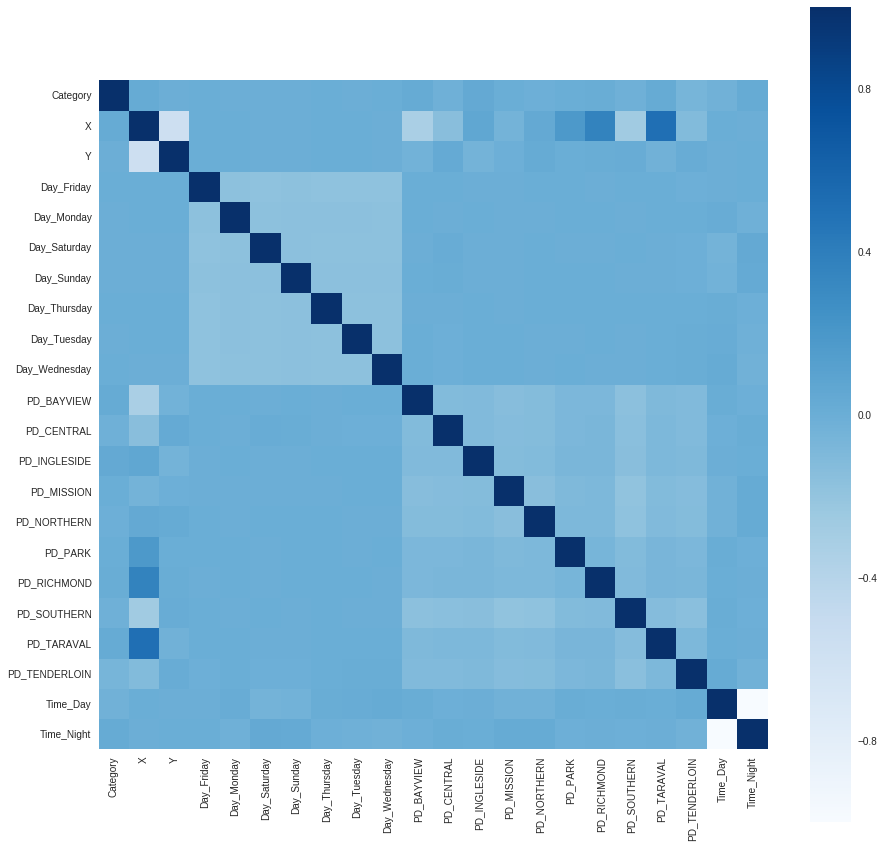

In [61]:
correlation=df_train.corr()
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15,15))
sns.heatmap(correlation,vmax=1,square=True,cmap='Blues')

In [81]:
print (df_train.head(4))
from sklearn.model_selection import train_test_split
      
df_train2=df_train.iloc[:150000,:]
features = df_train2.drop(['Category'], axis=1, inplace=False)
features = df_train2.drop(['Day_Friday'], axis=1, inplace=False)
features = df_train2.drop(['PD_INGLESIDE'], axis=1, inplace=False)
target = df_train2['Category']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3andom_state=42)

X_test.shape

   Category         X         Y  Day_Friday  Day_Monday  Day_Saturday  \
0        31  4.807506  3.631637           0           0             0   
1        18  4.807506  3.631637           0           0             0   
2        18  4.807493  3.632320           0           0             0   
3        13  4.807515  3.632332           0           0             0   

   Day_Sunday  Day_Thursday  Day_Tuesday  Day_Wednesday     ...      \
0           0             0            0              1     ...       
1           0             0            0              1     ...       
2           0             0            0              1     ...       
3           0             0            0              1     ...       

   PD_INGLESIDE  PD_MISSION  PD_NORTHERN  PD_PARK  PD_RICHMOND  PD_SOUTHERN  \
0             0           0            1        0            0            0   
1             0           0            1        0            0            0   
2             0           0            1 

(148500, 21)

In [0]:
from sklearn import svm

lr_model=svm.SVC()
lr_model.fit(X_train,y_train)
pred=lr_model.predict(X_test)

In [64]:
from sklearn import neighbors, datasets
knn =neighbors.KNeighborsClassifier()
knn=neighbors.KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [159]:
from sklearn.ensemble import RandomForestClassifier
forest_v = RandomForestClassifier(max_depth=16,n_estimators=256, oob_score=True)
forest_v.fit(X_train,y_train)
#y_pred = forest.predict_proba(validation[features])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=256, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [0]:
model=knn.predict(X_test)

In [0]:
model=forest_v.predict(X_test)


In [0]:
import numpy as np
myarray = np.asarray(model)
myarray2 = np.asarray(y_test)

In [0]:
correct=0
for i in range(0,len(y_test)):
    if ((myarray[i]) == (myarray2[i])):
        correct += 1
        

In [69]:
#correct
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
np.shape(confusion_matrix(pred,y_test))
display(confusion_matrix(pred,y_test))


array([[ 126,    0,    0, ...,    0,    0,    0],
       [   0, 6230,   10, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 3553,    0,    0],
       [   0,    0,    0, ...,    0, 3406,    0],
       [   0,    0,    0, ...,    0,    0,  782]])

In [79]:
from sklearn.metrics import accuracy_score
print ("accuracy score ", accuracy_score(pred,y_test)*100)
#print ('accuracy is : ',(float(correct) / len(y_train))*100)
y_test.shape


accuracy score  96.47878787878787


(148500,)